In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory
#              to predict the closing stock price of a corporation using the past 60 day stock price.

In [3]:
# Import libraries 
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')


In [8]:
# Get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start= '2012-01-01', end='2020-11-27')
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-20,118.769997,117.290001,118.639999,117.339996,73391400.0,117.339996
2020-11-23,117.620003,113.750000,117.180000,113.849998,127959300.0,113.849998
2020-11-24,115.849998,112.589996,113.910004,115.169998,113874200.0,115.169998
2020-11-25,116.750000,115.169998,115.550003,116.029999,76499200.0,116.029999
2020-11-27,117.489998,116.220001,116.570000,116.589996,46691300.0,116.589996


In [9]:
# Get the number of rows and colums
df.shape


(2242, 6)

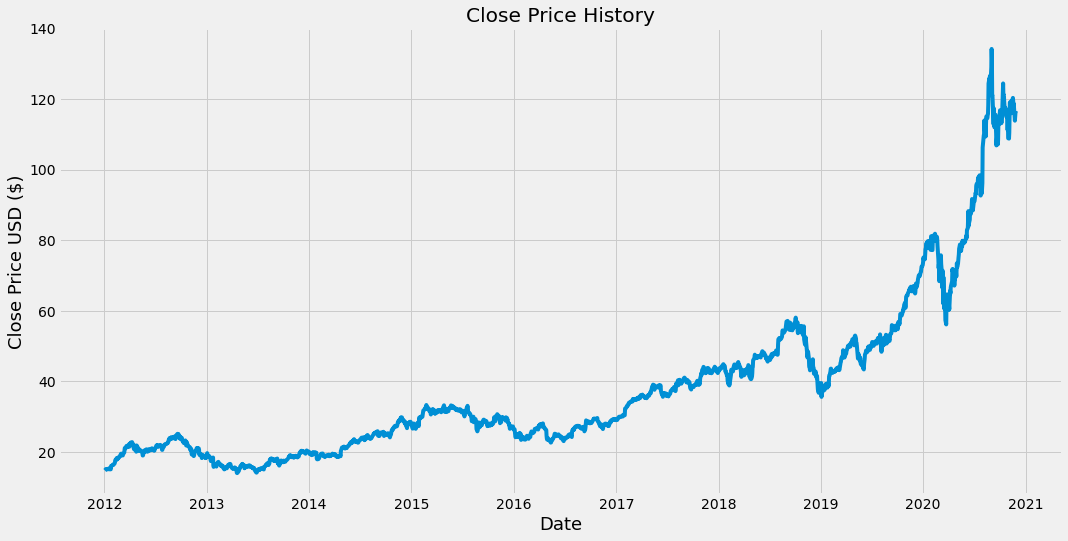

In [10]:
# Visualization
plt.figure(figsize=(16, 8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [11]:
# Create a new dataframe with only the Close column
data = df.filter(["Close"])
# Conver the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on 
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

1794

In [12]:
# Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.84188971],
       [0.84904252],
       [0.85370014]])

In [17]:
# Create the training data set 
# Creat the scaled training data set
train_data = scaled_data[0: training_data_len, :]
# Split the data
# x_train independent 
x_train = []
# y_train dependent
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()
    

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00884299, 0.01095496, 0.00887566,
       0.01667305, 0.01607005, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182524, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512389,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499021, 0.04593482, 0.04796361, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.06399208, 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00

In [18]:
# Conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
# Reshape the data to become three demensions 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1734, 60, 1)

In [23]:
# Build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
# Compile the model 
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [25]:
# Train the model 
model.fit (x_train, y_train, batch_size=1, epochs=1)

1734/1734 [==============================] - 63s 37ms/step - loss: 2.5265e-04


In [31]:
# Create the testing data set
# Create a new array scaled values
test_data = scaled_data[training_data_len - 60: , :]
# Creat the data sets x_tests and y_tests
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60: i, 0 ])

In [32]:
# Convert the data to a numpy array 
x_test = np.array(x_test)

In [35]:
# Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [37]:
# Get the root mean squared error (RMSE)
# Standard Deviation of the residuals 
# Lower the number the more accurate the model is, and zero would be exact 
rmse = np.sqrt( np.mean (predictions - y_test) ** 2)
rmse

5.017042824200222

<ipython-input-38-ec4ace3fa189>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


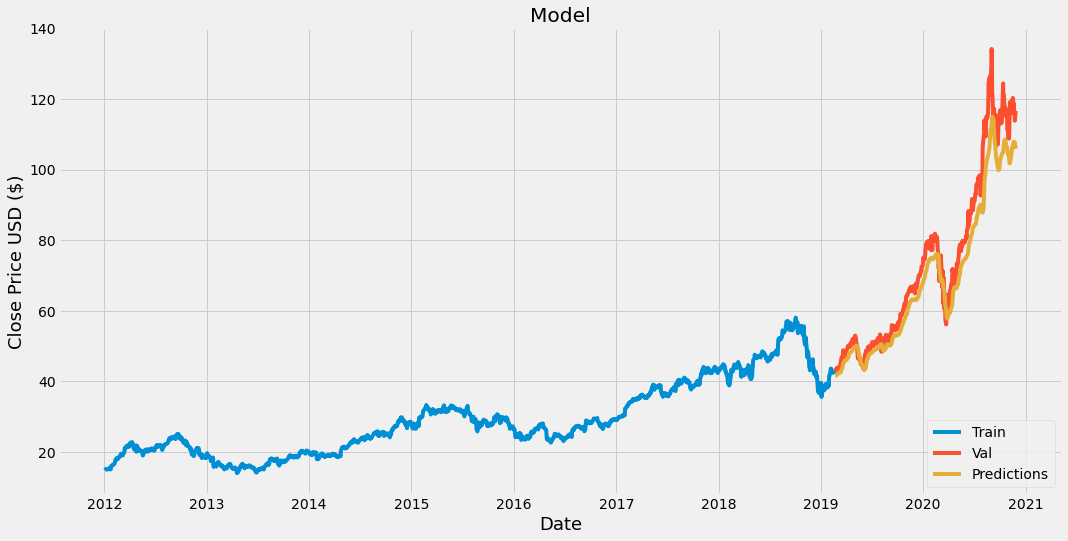

In [38]:
# Plot the data 
train = data[:training_data_len]
valid = data[training_data_len :]
valid['Predictions'] = predictions
# Visualize the data 
plt.figure(figsize=(16, 8))
plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price USD ($)", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

# Train is values model was trained on 
# Val was the actual stock price 
# Predictions is what the model predicted 

In [39]:
# Show the vailid and predicted price 
valid

,Close,Predictions
Date,,
2019-02-21,42.764999,41.573017
2019-02-22,43.242500,41.574013
2019-02-25,43.557499,41.618011
2019-02-26,43.582500,41.713326
2019-02-27,43.717499,41.834122
...,...,...
2020-11-20,117.339996,107.850037
2020-11-23,113.849998,107.654465
2020-11-24,115.169998,107.038330


In [51]:
# Get the quote 
apple_quote = web.DataReader("AAPL", data_source="yahoo", start = "2012-01-01", end= "2020-11-27")
# Create new dataframe
new_df = apple_quote.filter(["Close"])
# Get the last 60 day closing price values and convert the dataframe to an array 
last_60_days = new_df[-60: ].values 
# Scale the data to be values between 0 and 1 
last_60_days_scaled = scaler.transform(last_60_days)
# Creat an empty list 
X_test = []
# Append the past 60 days 
X_test.append(last_60_days_scaled)
# Covert the x_test data set to a numpy array 
X_test = np.array(X_test)
# Reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scale price 
pred_price = model.predict(X_test)
# Undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[105.55642]]


In [52]:
# Get the quote 
apple_quote2 = web.DataReader("AAPL", data_source="yahoo", start = "2020-11-27", end= "2020-11-27")
print(apple_quote2["Close"])

Date
2020-11-27    116.589996
2020-11-27    116.589996
Name: Close, dtype: float64
